# Q.1)
Instructions
Load the dataset using pandas read_csv API in variable data and give file path as path.
Print out the shape using .shape method
Print out the total number of missing values using the .isnull().sum() method of pandas.
Test Cases: The shape of the dataframe data should be (1372, 5).


In [10]:
# import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# Code starts here
path="Banknote.csv"
data=pd.read_csv(path)

In [11]:
data.shape

(1372, 5)

In [12]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [13]:
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


Applying Linear Regresion first with entropy as input and class as output

[1.15419999]


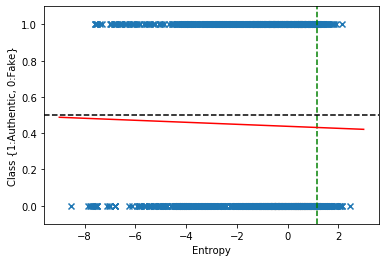

In [14]:
#The code snippet is given below:
# import packages
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

# instantiate model
linear_model = LinearRegression()

# fit the model
linear_model.fit(df[['entropy']], df[['class']])

# generate 1000 X-values
X_sample = np.linspace(-9, 3, 1000)

# calculate y-values for 1000 X-values
Y_sample = X_sample*linear_model.coef_[0] + linear_model.intercept_

# threshold for entropy
threshold  = (0.5 - linear_model.coef_[0]) / linear_model.intercept_
print(threshold)

# scatter plot 
plt.scatter(df[['entropy']], df[['class']], marker='x')

# axes specifications
plt.xlabel('Entropy')
plt.ylabel('Class {1:Authentic, 0:Fake}')
plt.ylim(-0.1, 1.1)

# threshold lines
plt.axvline(threshold, linestyle='--', color='green')
plt.axhline(0.5, linestyle='--', color='black')

# line plot
plt.plot(X_sample, Y_sample, color='red')

# display plot
plt.show()


 Let's add an outlier point and observe for ourselves whether or not the decision boundary and threshold changes.


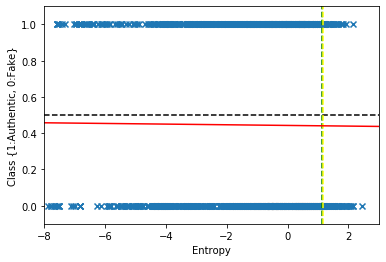

In [15]:
# instantiate the linear model
lm = LinearRegression()
 
# add outlier pointd to 'entropy' and 'class'
x = np.append(df.entropy.values, [35]).reshape(-1,1)
y = np.append(df['class'], [1]).reshape(-1,1)
 
# fit on new 'entropy' and 'class'
lm.fit(x, y)
 
# scatter plot 
plt.scatter(x, y, marker='x')
 
# axes modification
plt.xlabel('Entropy')
plt.ylabel('Class {1:Authentic, 0:Fake}')
plt.ylim(-0.1, 1.1)
 
# new threshold
new_threshold = (0.5 - lm.coef_[0]) / lm.intercept_
 
# threshold lines
plt.axvline(new_threshold, linestyle='--', color='green')
plt.axhline(0.5, linestyle='--', color='black')
plt.axvline(threshold, linestyle='--', color='yellow')
 
# line plots
new_Y_sample = X_sample* lm.coef_[0]+lm.intercept_
plt.plot(X_sample, new_Y_sample, color='red')
plt.xlim(-8, 3)
plt.show()


Quiz : Why not Linear Regression for classification?
QUESTION 1 OF 2
Using Linear regression for classification tasks results in the line being sensitive to outliers?
True..........y
False
 
QUESTION 2 OF 2
Is Logistic Regression used for regression?
True
False........y


# Q.2)
Make your own sigmoid function
In this task, you will be defining a sigmoid function which takes in a single argument and returns the sigmoid output as given in the slide.
Instructions
Define a function sigmoid that takes in a single variable x and returns the sigmoid transformation (Use np.exp() to represent exponent)
Calculate the sigmoid value for 0 and save it as result


In [16]:
def sigmoid(x):
    result=1/(1+np.exp(-x))
    return result
sigmoid(0)    

0.5

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


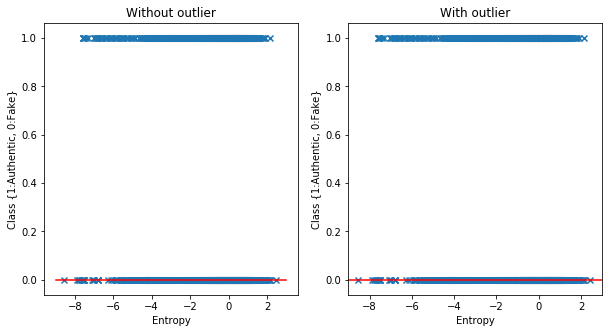

In [17]:
# import packages
from sklearn.linear_model import LogisticRegression
 
logreg1 = LogisticRegression()
logreg2 = LogisticRegression()
 
# Outlier points added
x = np.append(df.entropy.values, [35]).reshape(-1,1)
y = np.append(df['class'], [1]).reshape(-1,1)
 
# fit model
logreg1.fit(df[['entropy']], df[['class']])
logreg2.fit(x, y)
 
# initialize figures
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(10,5))
 
# scatter plot
ax_1.scatter(df[['entropy']], df[['class']], marker='x')
ax_2.scatter(x,y, marker='x')
 
# axes modifications
ax_1.set_title('Without outlier')
ax_2.set_title('With outlier')
ax_1.set_xlabel('Entropy')
ax_1.set_ylabel('Class {1:Authentic, 0:Fake}')
ax_2.set_xlabel('Entropy')
ax_2.set_ylabel('Class {1:Authentic, 0:Fake}')
 
# predictions
old_pred = logreg1.predict(X_sample.reshape(-1,1))
new_pred = logreg2.predict(X_sample.reshape(-1,1))
 
# line plots showing decision boundary for sigmoid
ax_1.plot(X_sample.reshape(-1,1), old_pred, color='red')
ax_2.plot(X_sample.reshape(-1,1), new_pred, color='red')
ax_2.set_xlim(-9, 3)
 
# display plot
plt.show()


Quiz : Nuts and bolts of Logistic Regression
QUESTION 1 OF 3
A total predicted logit of 0 can be transformed to a probability of?
1
0
0.5
0.25
 
QUESTION 2 OF 3
In logistic regression, what do we estimate for each unit’s change in X(feature)?
Change in Y multiplied with Y
Change in Y from its mean
How much Y changes
How much the natural logarithm of the odds for Y = 1
 
QUESTION 3 OF 3
Which of the following option is true?
Linear Regression errors values has to be normally distributed but in case of Logistic Regression it is not the case
Logistic Regression errors values has to be normally distributed but in case of Linear Regression it is not the case


In [18]:
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


# Q.3)
In this task, you are going to split the data into train and test and then standardize the data
Instructions
All the packages have been imported for you
Use .train_test_split() to split the dataset into train and test datasets with 
20
20% test data and random_state=42.The target variable here is 'class'. Name them as X_train, X_test, y_train and y_test
Initialize a scaler named scaler with MinMaxScaler. You can read more about it at Documentation.
Fit this scaler on the train data using .fit(X_train) and then transform both the train and test features with .transform() method
Instantiate a Logistic Regression model model and fit it on the transformed training features and training target i.e. X_train and y_train
Then make predictions on the transformed test features i.e. X_test and store it as y_pred


In [19]:
# import packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression


In [23]:
X=data.iloc[:,:-1]
y=data[['class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [25]:
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
1367,1
1368,1
1369,1
1370,1


In [28]:
scalar= MinMaxScaler()
scalar.fit(X_train)
scalar.transform(X_train) 
scalar.transform(X_test)
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

# Q.4)
Find accuracy, precision, recall, f-score
In this task, you will calculate the accuracy score, precision, recall and f-score and also visualise the confusion matrix to see how your classifier is performing.
Instructions
Use the predictions array and actual target labels y_test to calculate the confusion matrix accuracy, precision, recall, f-score and save them as cf, acc, precision, recall and f_score respectively.
Go through official documentations for accuracy, confusion matrix, F-1 score, precision, recall to look at the syntax.


In [29]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
cf

array([[146,   2],
       [  2, 125]], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.9854545454545455

In [31]:
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred)
precision

0.984251968503937

In [32]:
from sklearn.metrics import recall_score
recall=recall_score(y_test, y_pred)
recall

0.984251968503937

In [33]:
from sklearn.metrics import f1_score
f_score=f1_score(y_test, y_pred)
f_score

0.984251968503937

# Q.5)
Calculate AUC
In this task calculate the AUC score using scikit-learn's function
Instructions
Calculate the ROC AUC score using scikit learn and save it as roc. Go through its official documentation


In [35]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test, y_pred)
roc

0.9853692274952117